<a href="https://colab.research.google.com/github/ayush9304/CreditCardDefaultPrediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1**   - Ayush Kumar

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[https://github.com/ayush9304/CreditCardDefaultPrediction](https://github.com/ayush9304/CreditCardDefaultPrediction)

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

!pip install shap==0.40.0
import shap 
import graphviz

import pickle

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.6/567.6 KB 10.1 MB/s eta 0:00:00


### Dataset Loading

In [8]:
# Load Dataset
dataset = pd.read_excel("https://github.com/ayush9304/CreditCardDefaultPrediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true", header=1)

### Dataset First View

In [9]:
# Dataset First Look
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
dataset.shape

(30000, 25)

### Dataset Information

In [11]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape[0]

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
dataset.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

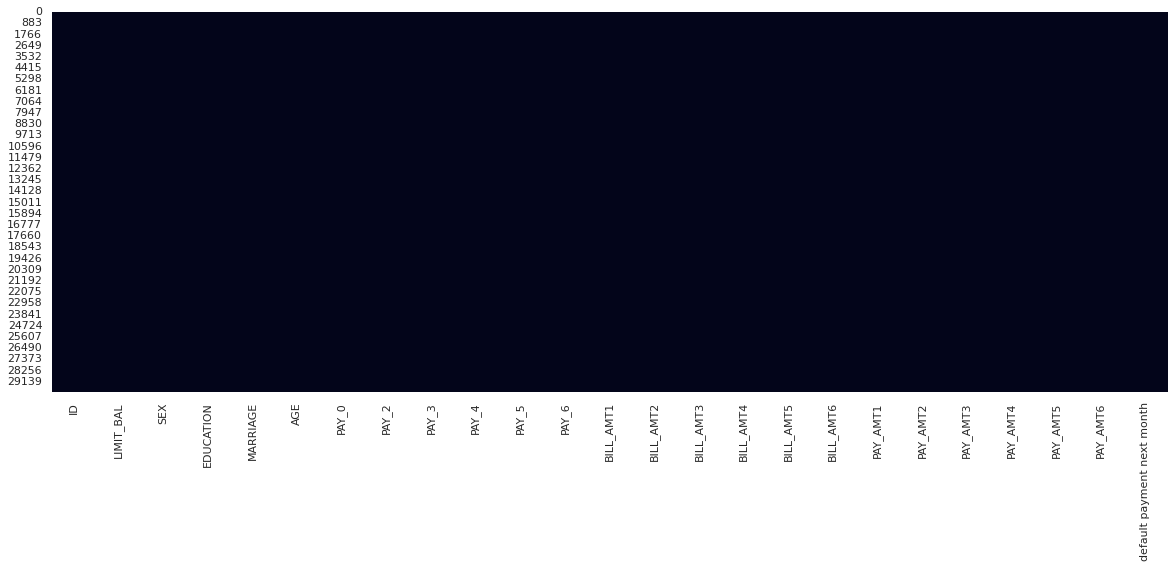

In [16]:
# Visualizing the missing values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [18]:
# Dataset Describe
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 0,4,5,6=others)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0 - PAY_6**: History of past payment (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) in reverse order like September then August then July etc.
* **BILL_AMT1 - BILL_AMT6**: Amount of bill statement in reverse order like September then August then July etc.
* **PAY_AMT1 - PAY_AMT6**: Amount of previous payment in reverse order like September then August then July etc.
* **default payment next month**: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

I see that in history of past payments columns (PAY_0 to PAY_6), there is no PAY_1 column, on the other hand other columns describing past payments like past payment bills (BILL_AMT1 to BILL_AMT6) and past payment amount (PAY_AMT1 to PAY_AMT6), they are for past 6 months numbered from 1 to 6. So renaming PAY_0 to PAY_1 to make data more sensible.

In [20]:
# Rename PAY_0 to PAY_1
dataset.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [303]:
# Create a copy of the current dataset and assigning to df
df = dataset.copy()

In [304]:
# Rename default payment next month to isDefault for convenience
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)

In [95]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [305]:
# Unique values of ID feature
df['ID'].unique()

array([    1,     2,     3, ..., 29998, 29999, 30000])

In [306]:
# To study if the client will default or not, ID has nothing to do with it, so dropping it
df.drop(['ID'], axis=1, inplace=True)

In [307]:
# Unique values and their counts of SEX feature
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [308]:
# Unique values and their counts of EDUCATION feature
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [309]:
# Unique values and their counts of MARRIAGE feature
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In marriage column, 0 values are not known and they are very small in number. So will combine these values in others category

In [310]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0: "Others"})

In [311]:
# Unique values and their counts of DEFAULT feature
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [312]:
# Replacing numerical values of categorical variables to appropriate labels for better visualizations
# In feature engineering I'll apply categorical encoding to these features
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 0 : 'Others', 4: 'Others', 5: 'Others', 6: 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
# df.replace({'DEFAULT' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [313]:
# Description of Age
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [314]:
# Willuse age bins to visualize rates for default by age sections
df["AGE BIN"] = pd.cut(df['AGE'], bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [315]:
# Creating new feature avg_credit_utilization_ratio
total_outstanding_balance = df.loc[:, 'BILL_AMT1':'BILL_AMT6'].sum(axis=1)
total_credit_limit = df['LIMIT_BAL'] * 6
df['avg_credit_utilization_ratio'] = total_outstanding_balance / total_credit_limit
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,AGE BIN,avg_credit_utilization_ratio
0,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,"(20, 25]",0.064200
1,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,"(25, 30]",0.023718
2,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,"(30, 35]",0.188246
3,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,"(35, 40]",0.771113
4,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,"(55, 60]",0.364463


In [316]:
# Creating new feature late_payment_count
# Create a list of payment status columns
payment_status_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Calculate the number of late payments for each user
df['late_payment_count'] = df[payment_status_cols].apply(lambda x: (x > 0).sum(), axis=1)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar chart & Pie Chart on Default

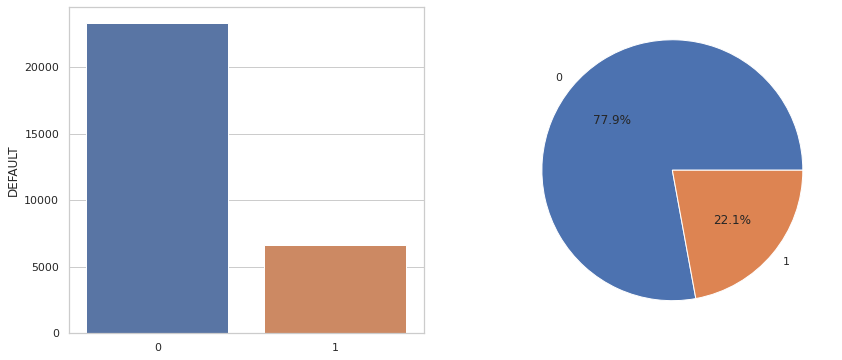

In [317]:
d = df['DEFAULT'].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=d.index, y=d)

plt.subplot(1,2,2)
p = plt.pie(d, labels=d.index, autopct="%.1f%%")

##### 1. Why did you pick the specific chart?

To check proportions of Defaulters among all the clients.

##### 2. What is/are the insight(s) found from the chart?

Around 22% clients gets defaulted. Also it is an imbalanced dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Bar chart & Pie chart of Default by sex

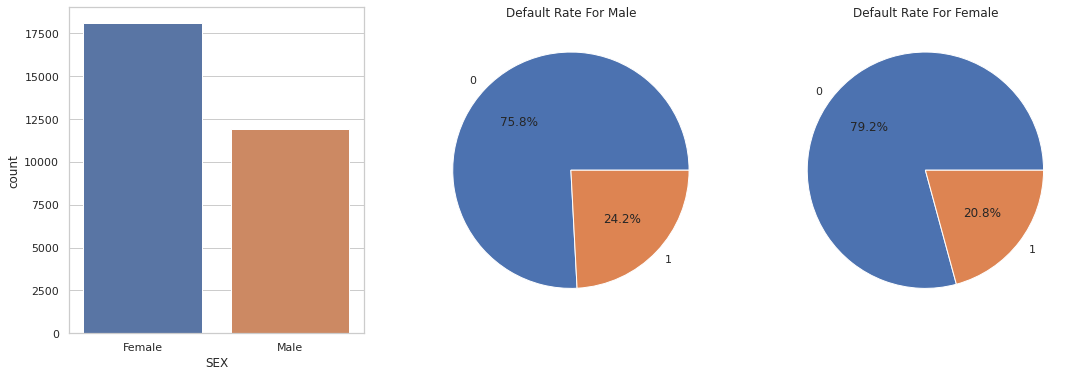

In [318]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='SEX', data=df)

d = df.groupby(['SEX', 'DEFAULT'])['DEFAULT'].count()

plt.subplot(1,3,2)
plt.title("Default Rate For Male")
p = plt.pie(d.Male, labels=d.Male.index, autopct="%.1f%%")

plt.subplot(1,3,3)
plt.title("Default Rate For Female")
p = plt.pie(d.Female, labels=d.Female.index, autopct="%.1f%%")

In [106]:
df.groupby(['SEX', 'DEFAULT'])['DEFAULT'].count().Male

DEFAULT
No     9015
Yes    2873
Name: DEFAULT, dtype: int64

##### 1. Why did you pick the specific chart?

Bar chart: To campare number of males and females.

Pie Chart: To get proportion of defaults for each sex.

##### 2. What is/are the insight(s) found from the chart?

There are more women than men in our dataset and apparently, men have a slightly higher rate of default compared to female.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 - Bar chart & Pie chart for default by education

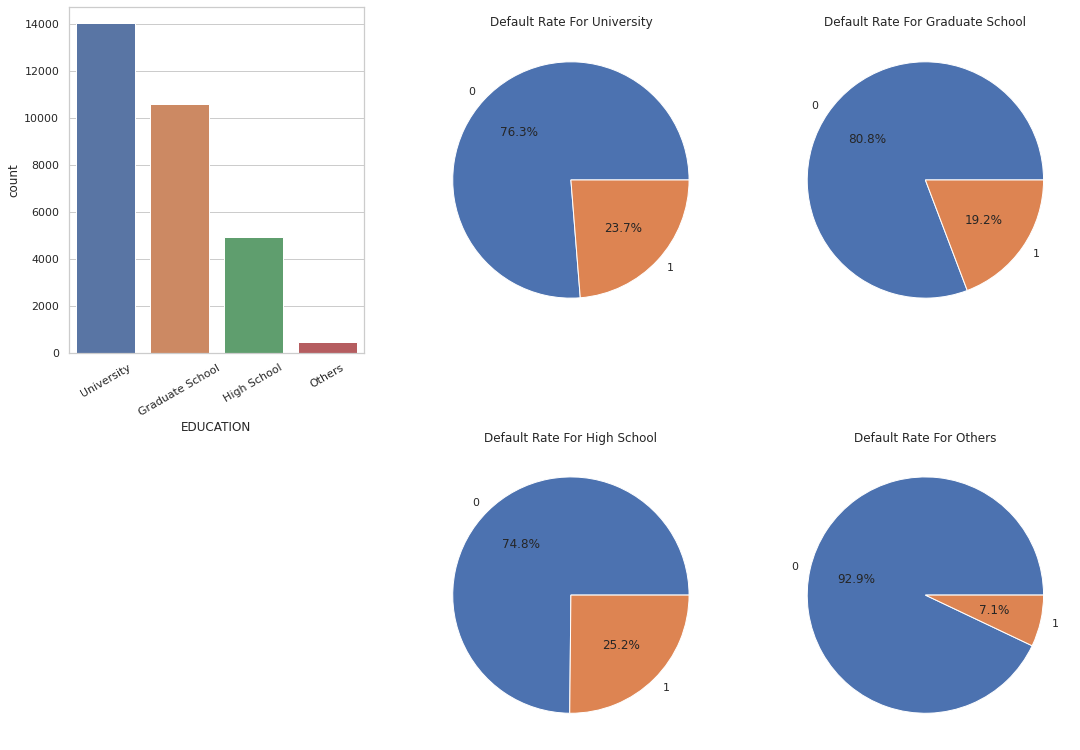

In [319]:
plt.figure(figsize=(18,14))
plt.subplot(2,3,1)
sns.countplot(x='EDUCATION', data=df)
p = plt.xticks(rotation=30)

d = df.groupby(['EDUCATION', 'DEFAULT'])['DEFAULT'].count()

plt.subplot(2,3,2)
plt.title("Default Rate For University")
p = plt.pie(d.University, labels=d.University.index, autopct="%.1f%%")

plt.subplot(2,3,3)
plt.title("Default Rate For Graduate School")
p = plt.pie(d['Graduate School'], labels=d['Graduate School'].index, autopct="%.1f%%")

plt.subplot(2,3,5)
plt.title("Default Rate For High School")
p = plt.pie(d['High School'], labels=d['High School'].index, autopct="%.1f%%")

plt.subplot(2,3,6)
plt.title("Default Rate For Others")
p = plt.pie(d.Others, labels=d.Others.index, autopct="%.1f%%")

##### 1. Why did you pick the specific chart?

Bar chart: To campare number of clients by Education.

Pie Chart: To get proportion of defaults for clients by each education.

##### 2. What is/are the insight(s) found from the chart?

Default rate for High School educated clients is highest and Others category clients has lowest rate of defaults.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Bar chart & Pie chart for default by Marriage

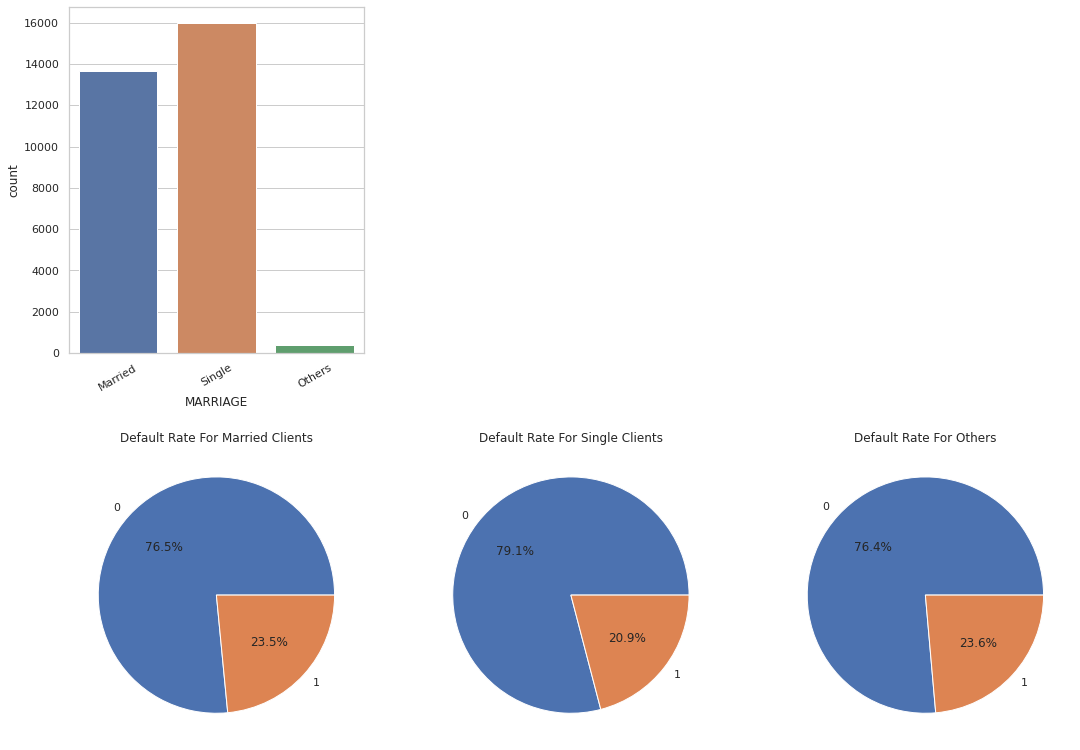

In [321]:
plt.figure(figsize=(18,14))
plt.subplot(2,3,1)
sns.countplot(x='MARRIAGE', data=df)
p = plt.xticks(rotation=30)

d = df.groupby(['MARRIAGE', 'DEFAULT'])['DEFAULT'].count()

plt.subplot(2,3,4)
plt.title("Default Rate For Married Clients")
p = plt.pie(d['Married'], labels=d['Married'].index, autopct="%.1f%%")

plt.subplot(2,3,5)
plt.title("Default Rate For Single Clients")
p = plt.pie(d['Single'], labels=d['Single'].index, autopct="%.1f%%")

plt.subplot(2,3,6)
plt.title("Default Rate For Others")
p = plt.pie(d.Others, labels=d.Others.index, autopct="%.1f%%")

##### 1. Why did you pick the specific chart?

Bar chart: To campare number of clients by Marriage.

Pie Chart: To get proportion of defaults for clients by each marriage.

##### 2. What is/are the insight(s) found from the chart?

Most people fall under Married and Single category with singles being highest.

The default rate in all the categories is almost same with in Others and Married clients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='AGE', ylabel='Count'>

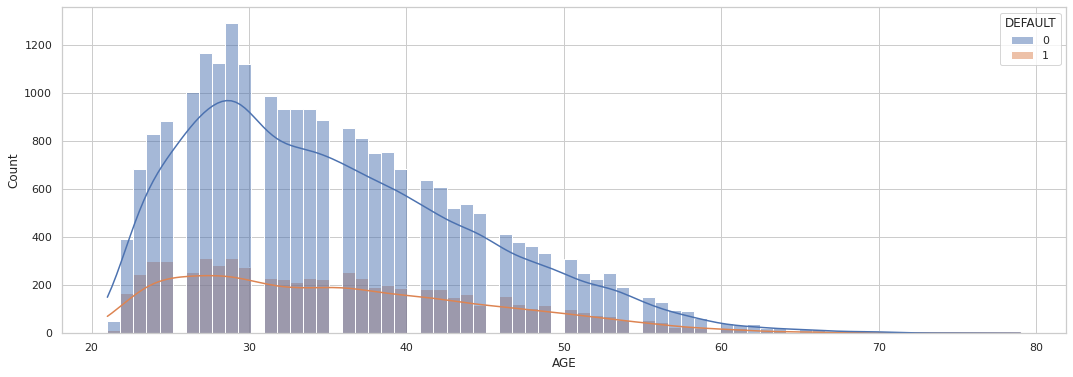

In [323]:
plt.figure(figsize=(18,6))
sns.histplot(x='AGE', data=df, hue='DEFAULT',kde=True)

##### 1. Why did you pick the specific chart?

To compare numbers of clients by age.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Bar Plot for default rate by age group

Text(0, 0.5, 'Default Rate')

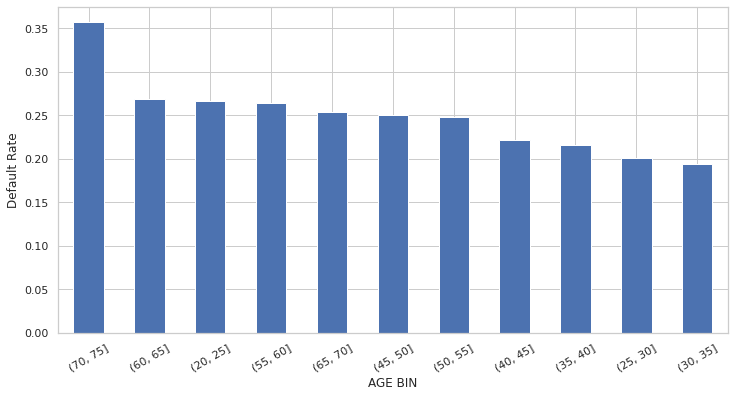

In [326]:
plt.figure(figsize=(12,6))
df.groupby('AGE BIN')['DEFAULT'].value_counts(normalize = True)[:, 1].sort_values(ascending=False).plot(kind='bar')
p = plt.xticks(rotation=30)
plt.ylabel("Default Rate")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The lowest default rate are in clients with 30-35 years age, while the highest default rates occur with clients with age 20-25 or 60+.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Distribution of LIMIT_BAL

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

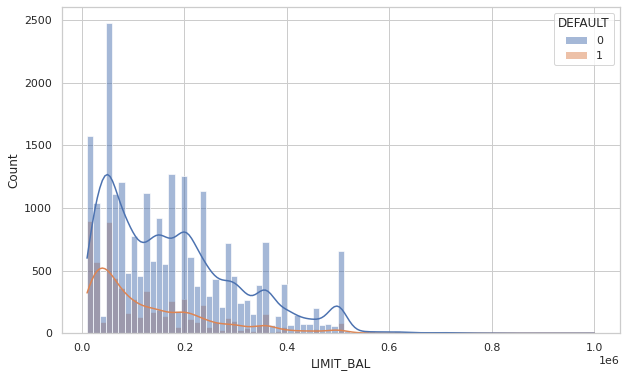

In [327]:
plt.figure(figsize=(10,6))
sns.histplot(x='LIMIT_BAL', hue='DEFAULT', data=df, kde=True)

##### 1. Why did you pick the specific chart?

Histogram to visualiza distribution of LIMIT_BAL.

##### 2. What is/are the insight(s) found from the chart?

As expected, the distribution is right skewed and most customers have 200k or less of credit limit and more customers going default on that range.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Histogram of avg_credit_utilization_rate

<Axes: xlabel='avg_credit_utilization_ratio', ylabel='Count'>

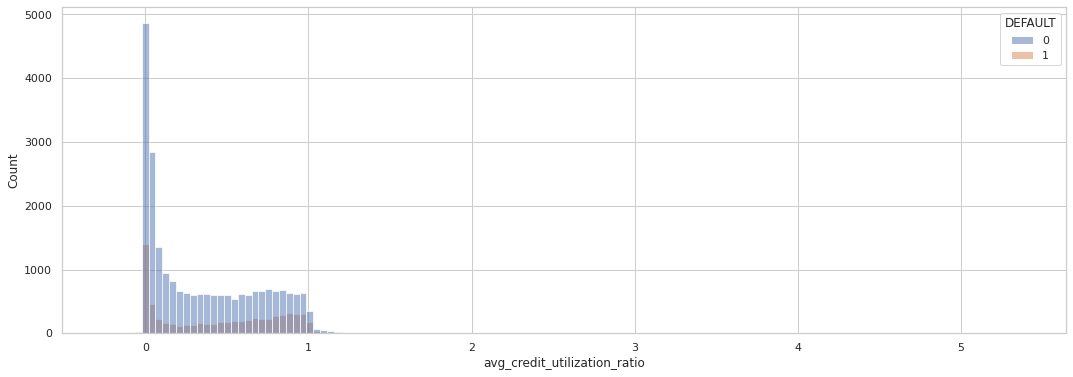

In [328]:
plt.figure(figsize=(18,6))
sns.histplot(x='avg_credit_utilization_ratio', data=df, hue='DEFAULT')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

As the credit utilization rate increases, the rate of defaults also increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Bar chart default rate for different bill amount groups

In [329]:
df2 = df.copy()

bill_amtx = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bill_amtx_bins = ['BILL_AMT1_BIN', 'BILL_AMT2_BIN', 'BILL_AMT3_BIN', 'BILL_AMT4_BIN', 'BILL_AMT5_BIN', 'BILL_AMT6_BIN']

for i, col in enumerate (bill_amtx_bins):
    df2[col] = pd.cut(df2[bill_amtx[i]],[-350000, -1, 0, 25000, 75000, 200000, 2000000])

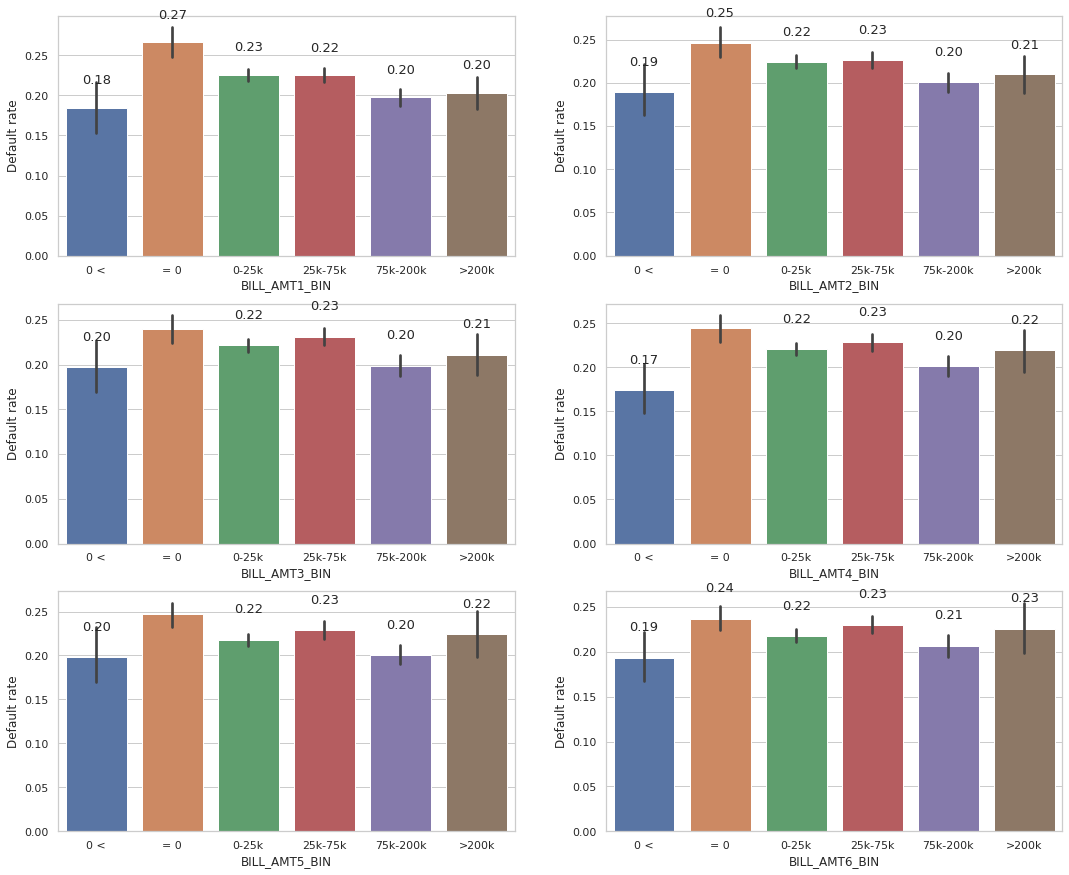

In [331]:
plt.figure(figsize=(18,15))
for i,col in enumerate(bill_amtx_bins):
    plt.subplot(3, 2, i+1)
    ax = sns.barplot(x = df2[col], y = df2['DEFAULT'])
    plt.ylabel("Default rate")
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'])
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

As expected, those who have a negative bill statement have a lower chance of default than the rest. What stands out is that there is a little higher chance of default for those who didn't have a bill in the previous months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Bar plot default rate by late payment count

Text(0, 0.5, 'Default Rate')

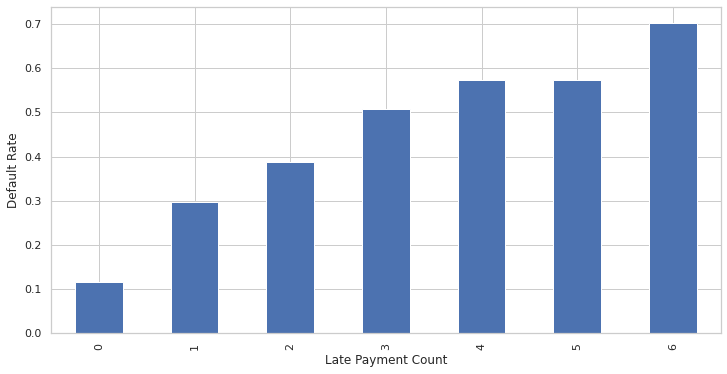

In [332]:
default_rate = df.groupby('late_payment_count')['DEFAULT'].mean()

plt.figure(figsize=(12,6))
default_rate.plot(kind='bar')
plt.xlabel('Late Payment Count')
plt.ylabel('Default Rate')

##### 1. Why did you pick the specific chart?

Bar plot to plot rate of default for different late payment count

##### 2. What is/are the insight(s) found from the chart?

As late payment count increases, chances of default increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [333]:
df2 = df.copy()

pay_amtx = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    df2[col] = pd.cut(df[pay_amtx[i]],[-1, 0, 25000, 50000, 100000, 2000000])

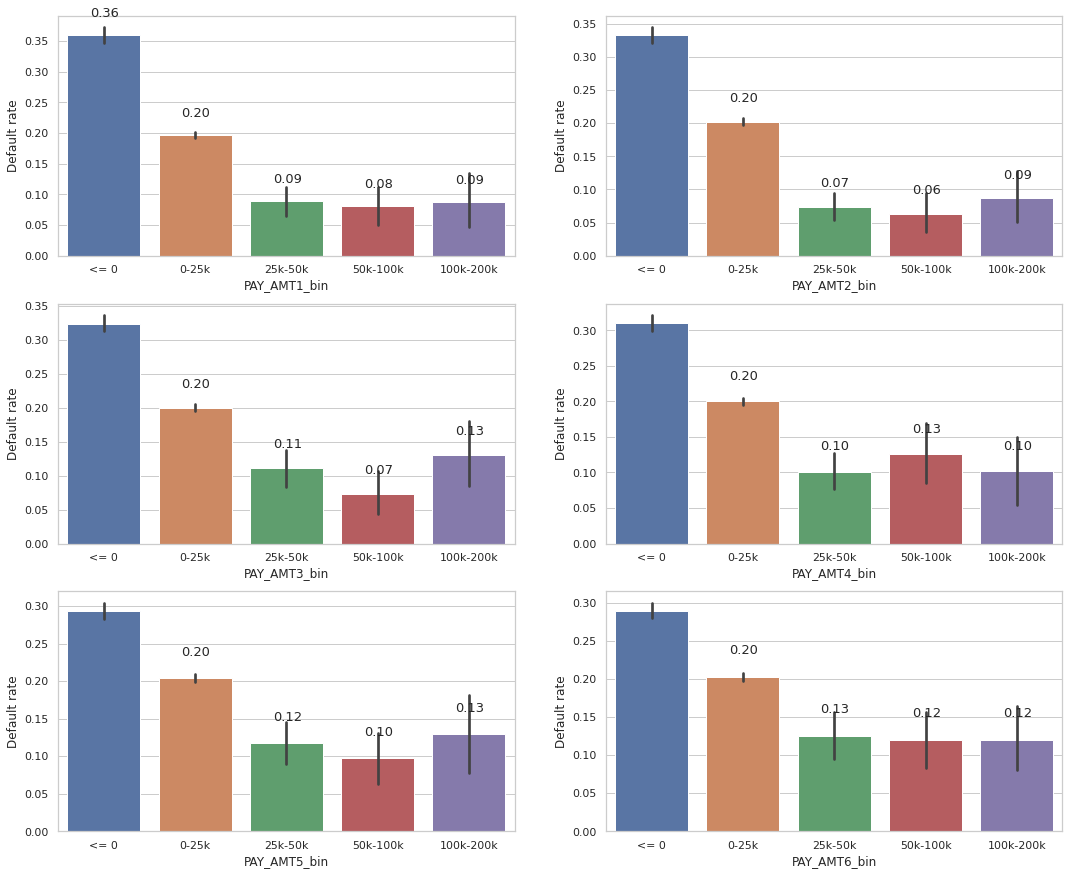

In [335]:
plt.figure(figsize=(18,15))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "DEFAULT", data = df2)
    plt.ylabel("Default rate")
    plt.xticks([0,1,2,3,4],['<= 0', '0-25k', '25k-50k', '50k-100k', '100k-200k'])
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Default rate is higher among those who paid nothing in previous months and lower rates among those paid over 25k.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

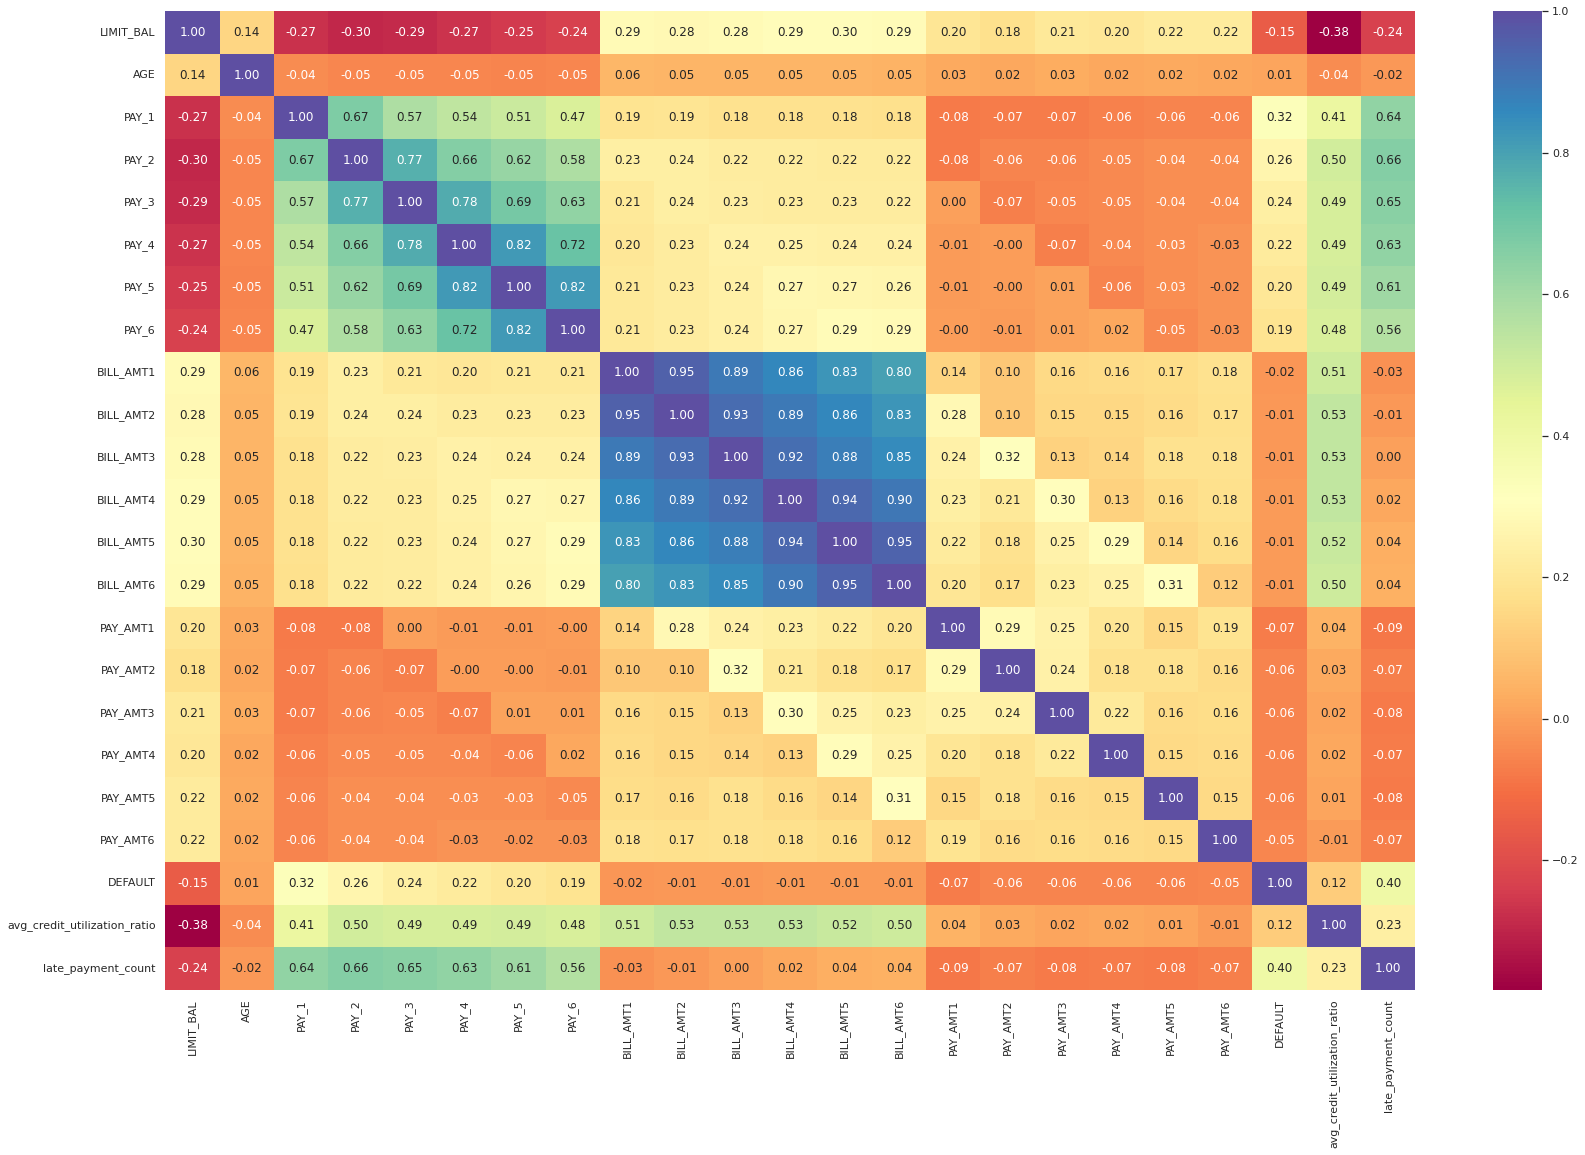

In [339]:
corr = df.corr()
f, ax = plt.subplots(figsize=(28, 18))
sns.heatmap(corr, annot = True, fmt='.2f', cmap="Spectral")

##### 1. Why did you pick the specific chart?

To check the correlation between each features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue="DEFAULT")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***